In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

## Predict bbox

In [30]:
import os
import pytorch_lightning as pl
from main import get_args, ReactionExtractorPix2Seq
from predict import predict_images
from reaction.dataset import ReactionDataset, get_collate_fn
from reaction.tokenizer import get_tokenizer

args = get_args(notebook=True)
args.formats = ["bbox"]
args.save_path = "/Mounts/rbg-storage1/users/yujieq/reaction/output/pix2seq_bbox_rand/"
args.image_path = "/Mounts/rbg-storage1/users/yujieq/reaction/data/detect/images/"
args.images = ["acs.joc.5b00301-Figure-c8.png"] * 1
args.pix2seq = True

tokenizer = get_tokenizer(args)

dataset = ReactionDataset(args, tokenizer, image_files=args.images, split='test')

model = ReactionExtractorPix2Seq.load_from_checkpoint(
    os.path.join(args.save_path, 'checkpoints/best.ckpt'), strict=False, args=args, tokenizer=tokenizer)

trainer = pl.Trainer(
    gpus=1,
    default_root_dir='tmp',
    deterministic=True)

prediction = predict_images(trainer, model, dataset)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


In [31]:
print(len(prediction['bbox']))

1


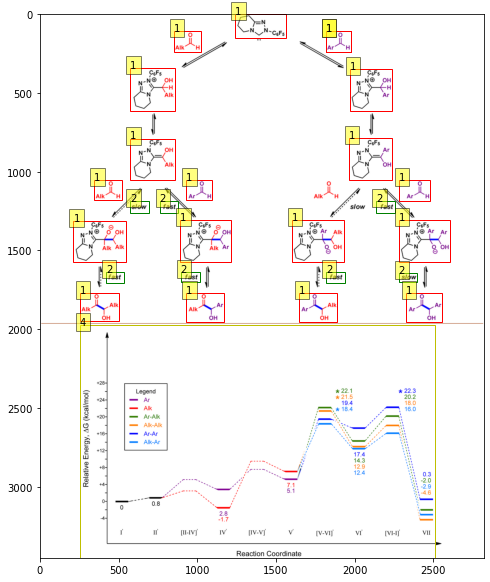

In [34]:
import cv2
import matplotlib.pyplot as plt
from reaction.data import BBox

for i, file in enumerate(args.images):
    img = cv2.imread(os.path.join(args.image_path, file))
    h, w, _ = img.shape
    boxes = [BBox(box, w, h, xyxy=True, normalized=True) for box in prediction['bbox'][i]]

    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(img)
    for box in boxes:
        box.draw(ax)
    plt.show()

## Predict reaction

In [41]:
import os
import pytorch_lightning as pl
from main import get_args, ReactionExtractorPix2Seq
from predict import predict_images
from reaction.dataset import ReactionDataset, get_collate_fn
from reaction.tokenizer import get_tokenizer

args = get_args(notebook=True)
args.formats = ["reaction"]
args.save_path = "/Mounts/rbg-storage1/users/yujieq/reaction/output/pix2seq_reaction_rotate/"
args.image_path = "/Mounts/rbg-storage1/users/yujieq/reaction/data/parse/images/"
args.images = ["op8001799-Figure-c1.png"] * 1
args.pix2seq = True

tokenizer = get_tokenizer(args)

dataset = ReactionDataset(args, tokenizer, image_files=args.images, split='test')

model = ReactionExtractorPix2Seq.load_from_checkpoint(
    os.path.join(args.save_path, 'checkpoints/best.ckpt'), strict=False, args=args, tokenizer=tokenizer)

trainer = pl.Trainer(
    gpus=1,
    default_root_dir='tmp',
    deterministic=True)

prediction = predict_images(trainer, model, dataset)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]


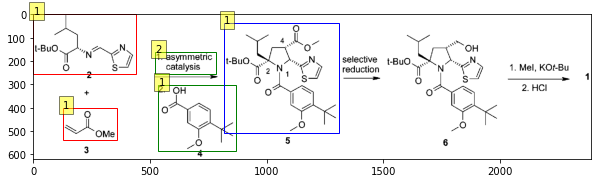

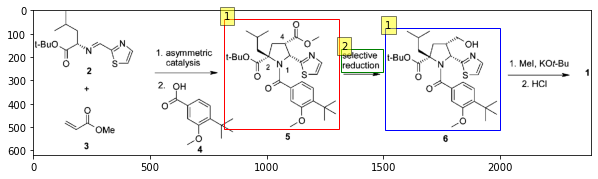

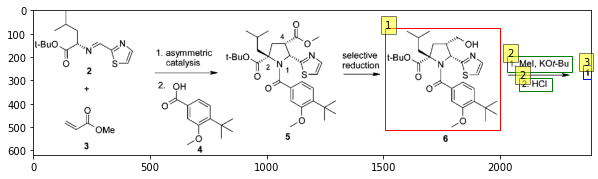

In [42]:
import cv2
import matplotlib.pyplot as plt
from reaction.data import BBox, Reaction

for i, file in enumerate(args.images):
    img = cv2.imread(os.path.join(args.image_path, file))
    h, w, _ = img.shape
    reactions = [
        Reaction({
            key: [BBox(bbox, w, h, xyxy=True, normalized=True) for bbox in reaction[key]]
            for key in ['reactants', 'conditions', 'products']
        })
        for reaction in prediction['reaction'][i]
    ]
    for r in reactions:
        fig, ax = plt.subplots(figsize=(10,10))
        ax.imshow(img)
        r.draw(ax)
        plt.show()